In [1]:
import numpy as np
import matplotlib.pyplot as plt

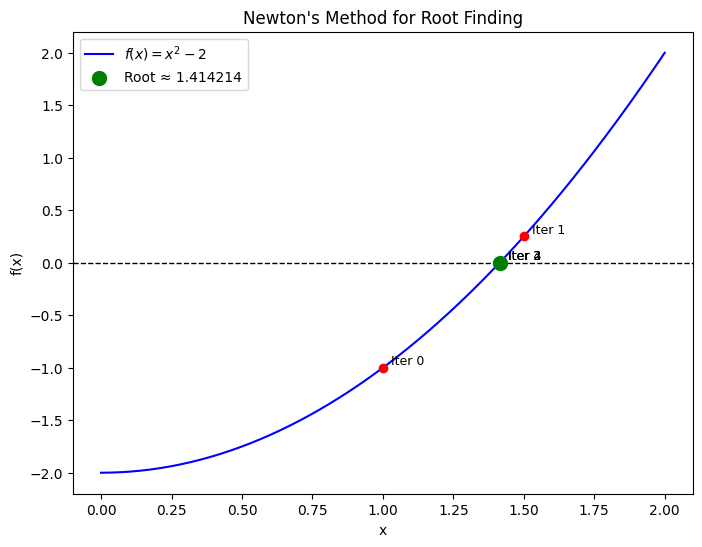

In [15]:
def newtons_method(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    iterations = [x]
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x, iterations  # Converged to a root
        if dfx == 0:
            raise ValueError("Derivative is zero, Newton's method fails.")
        x -= fx / dfx
        iterations.append(x)
    
    raise ValueError("Maximum iterations reached, solution may not have converged.")

# Example: f(x) = x^2 - 2 (finding sqrt(2))
f = lambda x: x**2 - 2
df = lambda x: 2*x

# Solve for root
x0 = 1.0 
root, iterates = newtons_method(f, df, x0)

# Plot the function
x_vals = np.linspace(0, 2, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2 - 2$', color='blue')
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Plot iterations
for i, x in enumerate(iterates):
    plt.scatter(x, f(x), color='red', zorder=3)
    plt.text(x, f(x), f'  Iter {i}', verticalalignment='bottom', fontsize=9)

plt.scatter(root, f(root), color='green', s=100, label=f'Root ≈ {root:.6f}', zorder=4)
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton's Method for Root Finding")
plt.show()


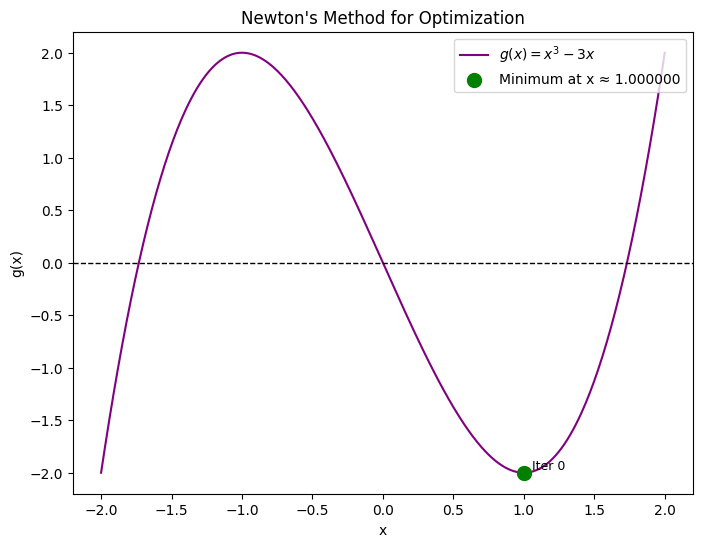

In [27]:
def newtons_optimization(g, dg, d2g, x0, tol=1e-6, max_iter=100):
    x = x0
    iterations = [x]
    for _ in range(max_iter):
        dgx = dg(x)
        d2gx = d2g(x)
        if abs(dgx) < tol:
            return x, iterations  # Critical point found
        if d2gx == 0:
            raise ValueError("Second derivative is zero, Newton's method fails.")
        x -= dgx / d2gx
        iterations.append(x)

    raise ValueError("Maximum iterations reached, solution may not have converged.")

# Example: g(x) = x^3 - 3x
g = lambda x: x**3 - 3*x
# dg/dx
dg = lambda x: 3*x**2 - 3
# d^2g/dx^2
d2g = lambda x: 6*x

# Solve for min/max
x0 = 1.0 
critical_point, iterates = newtons_optimization(g, dg, d2g, x0)

# Classify min or max
curvature = d2g(critical_point)
point_type = "Minimum" if curvature > 0 else "Maximum"

# Plot function
x_vals = np.linspace(-2, 2, 400)
y_vals = g(x_vals)

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label=r'$g(x) = x^3 - 3x$', color='purple')
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Plot iterations
for i, x in enumerate(iterates):
    plt.scatter(x, g(x), color='red', zorder=3)
    plt.text(x, g(x), f'  Iter {i}', verticalalignment='bottom', fontsize=9)

plt.scatter(critical_point, g(critical_point), color='green', s=100, 
            label=f'{point_type} at x ≈ {critical_point:.6f}', zorder=4)
plt.legend()
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Newton's Method for Optimization")
plt.show()


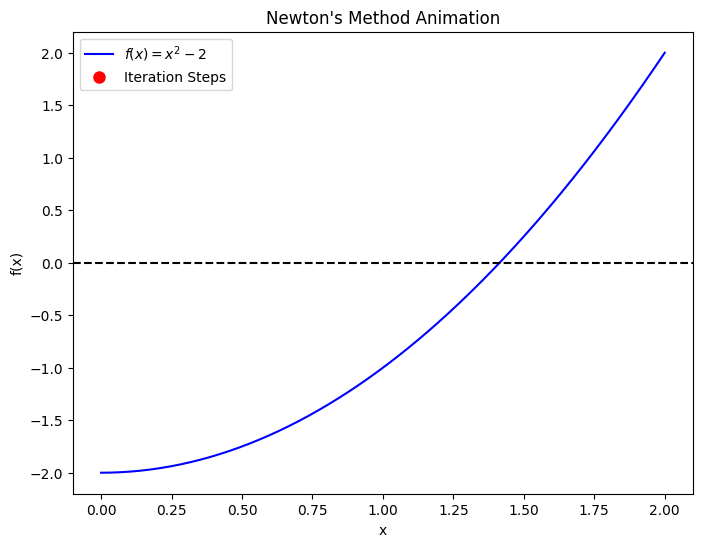

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define function and derivative
f = lambda x: x**2 - 2   # Function: f(x) = x² - 2
df = lambda x: 2*x       # Derivative: f'(x) = 2x

# Newton's Method function
def newtons_method(f, df, x0, tol=1e-6, max_iter=10):
    x = x0
    iterates = [x]  # Store iterations
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:  # Stop if close to root
            break
        x -= fx / dfx
        iterates.append(x)
    return iterates

# Initial guess
x0 = 1.5
iterates = newtons_method(f, df, x0)

# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot function
x_vals = np.linspace(0, 2, 400)
y_vals = f(x_vals)
ax.plot(x_vals, y_vals, label=r'$f(x) = x^2 - 2$', color='blue')
ax.axhline(0, color='black', linestyle='--')  # x-axis

# Red dot for animation
point, = ax.plot([], [], 'ro', markersize=8, label="Iteration Steps")

# Function to initialize the animation
def init():
    point.set_data([], [])
    return point,

# Function to update animation
def update(frame):
    x = iterates[frame]
    y = f(x)
    point.set_data(x, y)  # Update red dot position
    return point,

# Animate
ani = animation.FuncAnimation(fig, update, frames=len(iterates), init_func=init, 
                              interval=800, blit=True, repeat=False)

# Show the animation
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton's Method Animation")

plt.show()
